### Python Notebook 5: Feature Expansion, Overfitting, Regularisation

Statistical Machine Learning Course
Dept of Statistics, University of Oxford

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# Default plotting parameters
font = {'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.dpi'] = 100
# For saving the figures
svfigs = False # True if you want to save figures
svdir = './figures/' # directory to save the figures
if svfigs: # set a higher resolution if saving the figures
    plt.rcParams['figure.dpi'] = 150
else:
    plt.rcParams['figure.dpi'] = 75 
    

font = {'size'   : 18}
plt.rc('font', **font)

# Set the seed for reproducibility
np.random.seed(11)

Generate and plot synthetic dataset

In [3]:
# Bayes prediction rule
def h_star(x): 
    return np.sin(x *2*np.pi)
sd = .5 # standard deviation of the additive noise

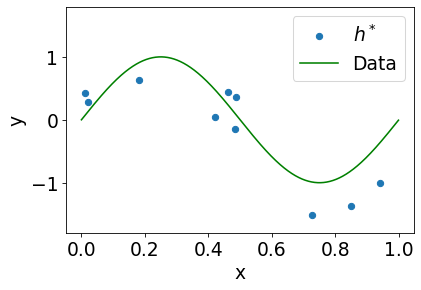

In [4]:
# Generate synthetic dataset
n = 10
X = np.random.uniform(size = (n, 1))
y = h_star(X) + np.random.normal(loc=0, scale=sd, size=(n, 1))

# Plot dataset and Bayes prediction rule
# Grid of values from 0 to 1
X_grid = np.arange(0,1,.001)
plt.figure()
plt.scatter(X, y)
plt.plot(X_grid, h_star(X_grid), color='green')
plt.ylim(-1.8,1.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend([r'$h^*$','Data'])
if svfigs:
    plt.savefig(svdir + 'regression_sin_data', bbox_inches = 'tight')

Polynomial feature expansion

,0,1,2,3,4,5,6,7,8,9
0,-0.186398,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.755887,-2.054572,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.466387,0.229246,-2.498318e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.157372,8.661358,-2.728817e+01,1.767492e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.346627,0.396913,1.349806e+01,-4.866865e+01,3.432832e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.398231,-3.151340,4.413429e+01,-1.391751e+02,1.426017e+02,-4.518979e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,-0.213550,42.282884,-4.247881e+02,1.672603e+03,-3.115271e+03,2.719902e+03,-8.963012e+02,0.000000e+00,0.000000e+00,0.000000e+00
7,0.751020,-32.680592,5.313452e+02,-3.347303e+03,1.019433e+04,-1.605787e+04,1.254430e+04,-3.837453e+03,0.000000e+00,0.000000e+00
8,1.421208,-123.827791,4.093785e+03,-4.182315e+04,1.926777e+05,-4.646039e+05,6.090019e+05,-4.110787e+05,1.119133e+05,0.000000e+00
9,171.607419,-24859.769972,1.052225e+06,-1.306091e+07,7.544969e+07,-2.398787e+08,4.460104e+08,-4.833533e+08,2.827070e+08,-6.892263e+07


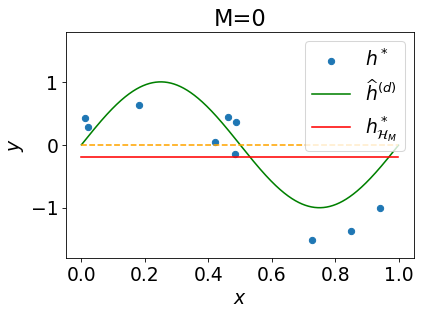

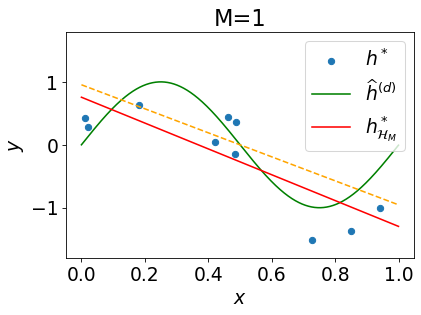

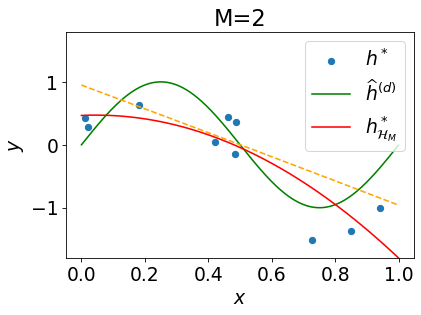

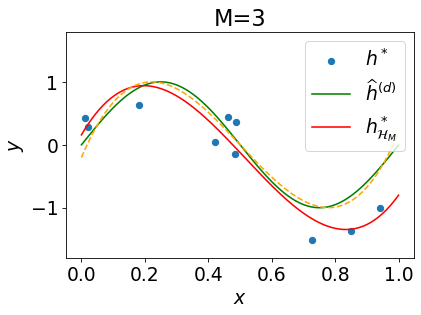

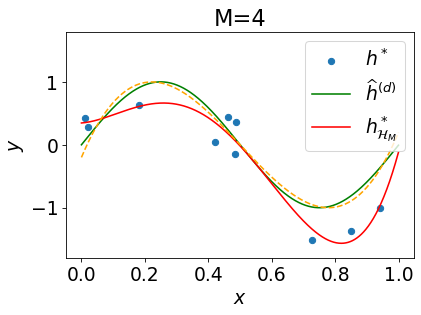

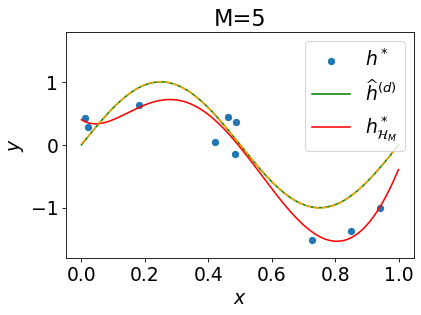

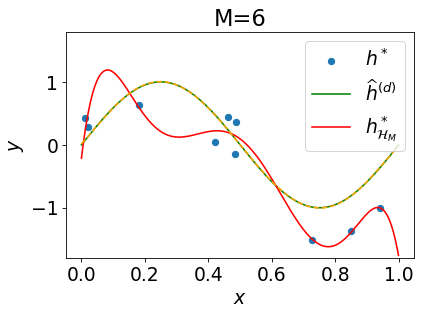

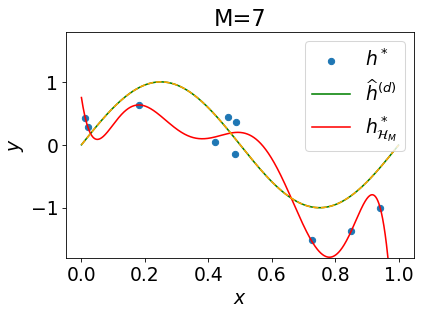

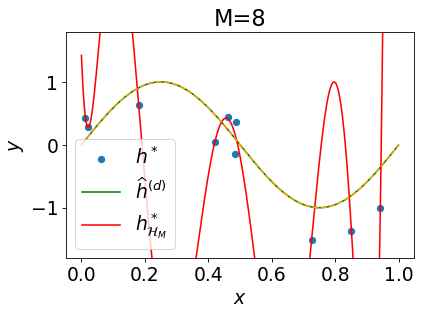

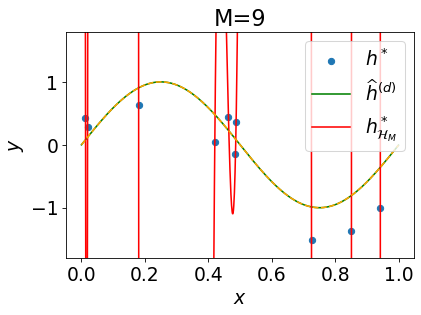

In [5]:
# In order to find numerically the best prediction rule within each class of hypothesis:
y_grid = h_star(X_grid)

regr = linear_model.LinearRegression(fit_intercept=False)

Mmax = 9
approxerror= np.empty(shape=Mmax+1)
truerisk= np.empty(shape=Mmax+1)
emprisk = np.empty(shape=Mmax+1)

beta = np.zeros(shape=(Mmax+1, Mmax+1))

for M in np.arange(0,Mmax+1):
    # Generate polynomial features
    poly_reg = PolynomialFeatures(degree=M)
    X_poly = poly_reg.fit_transform(X.reshape(-1,1))
    X_grid_poly = poly_reg.fit_transform(X_grid.reshape(-1,1))
    
    # Compute ERM and the associated true and empirical risk
    regr.fit(X_poly, y)
    y_pred = regr.predict(X_grid_poly)
    truerisk[M] = ((h_star(X_grid).reshape(-1,1) - y_pred) ** 2).mean() + sd**2 # True risk of predictor 
    emprisk[M] = ((y - regr.predict(X_poly)) ** 2).mean() # Empirical risk of predictor
    
    #print('M=', str(M), ': beta=', regr.coef_[:])
    beta[M,0:M+1] = regr.coef_[:]
    
    plt.figure()
    plt.scatter(X, y)
    plt.plot(X_grid, h_star(X_grid), color='green')    
    plt.plot(X_grid, y_pred, color='red')    
    plt.ylim(-1.,1)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.ylim(-1.8,1.8)
    filename = 'regression_sin_p' + str(M) +'.png'
    if svfigs:
        plt.savefig(svdir + filename, bbox_inches = 'tight')
    
    # Compute the optimal prediction rule within the class numerically, and the associated approximation error
    regr.fit(X_grid_poly, y_grid)        
    y_grid_pred = regr.predict(X_grid_poly)
    approxerror[M] = ((h_star(X_grid) - y_grid_pred) ** 2).mean() # Approximation error
    plt.plot(X_grid, y_grid_pred, '--', color='orange')      
    plt.title('M='+str(M))
    plt.legend([r'$h^*$',r'$\widehat h^{(d)}$',r'$h_{\mathcal{H}_M}^*$'])
    if svfigs:
        filename = svdir + 'regression_sin2_p' + str(M) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')
    
beta = pd.DataFrame(beta)   
beta

True and empirical risk

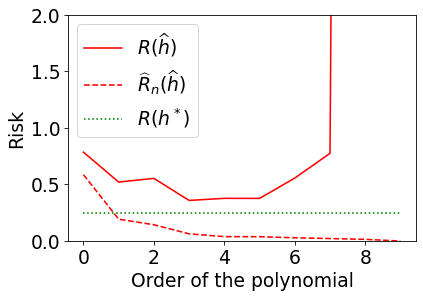

In [6]:
plt.figure()
plt.plot(truerisk, color='red')
plt.plot(emprisk,'--' , color='red' )
plt.plot(sd**2 * np.ones(shape=emprisk.size),':' , color='green' )
plt.ylim(0,2)
plt.ylabel('Risk')
plt.xlabel('Order of the polynomial')
plt.legend([r'$R(\widehat h)$', r'$\widehat R_n(\widehat h)$', r'$R(h^*)$'])
if svfigs:
    filename = svdir + 'risk_sin'
    plt.savefig(filename, bbox_inches = 'tight')

Approximation-Estimation trade-off

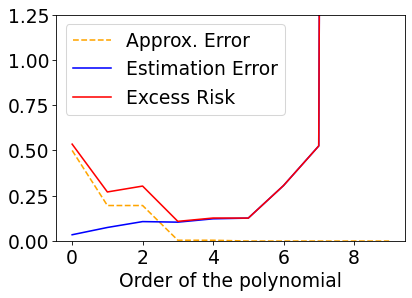

In [7]:
plt.figure()
bayesrisk = sd**2
excessrisk = truerisk - sd**2
plt.plot(approxerror, '--', color = 'orange')
plt.plot(excessrisk-approxerror, color='blue')
plt.plot(excessrisk, color='red')
plt.ylim(0,1.25)
plt.xlabel('Order of the polynomial')
plt.legend(['Approx. Error', 'Estimation Error','Excess Risk'], loc=2)
if svfigs:
    filename = svdir + 'risk2_sin'
    plt.savefig(filename, bbox_inches = 'tight')

Bias-Variance Trade-off

In [8]:
# Illustration bias-variance trade-off
# Simulate multiple replicated datasets of size n
nrep = 1000
n = 30 # Note that the sample size if higher than before, for better visualisation
X_rep = np.random.uniform(size = (n, nrep))
y_rep = h_star(X_rep) + np.random.normal(loc=0, scale=sd, size=(n, nrep))
y_pred =np.zeros(shape=(X_grid.size, nrep)) 
print(X_rep.shape)
print(y_pred.shape)

(30, 1000)
(1000, 1000)


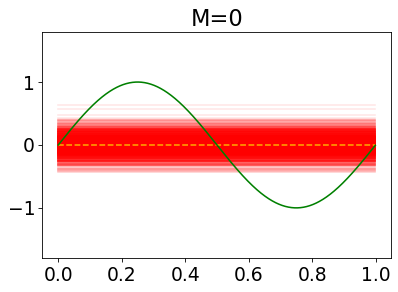

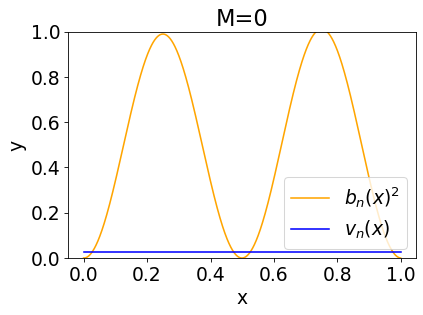

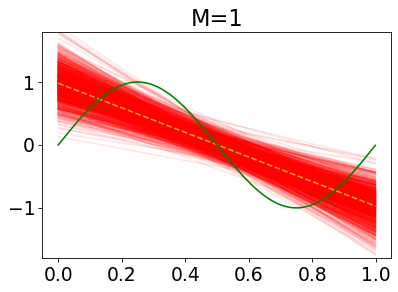

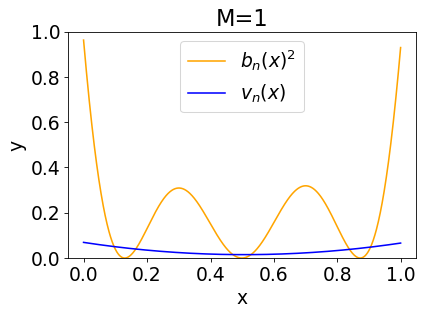

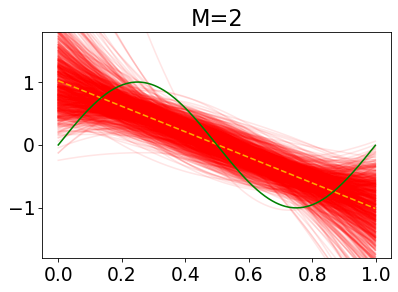

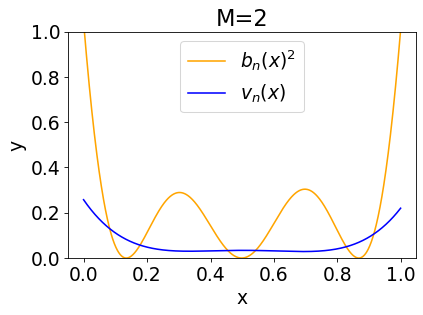

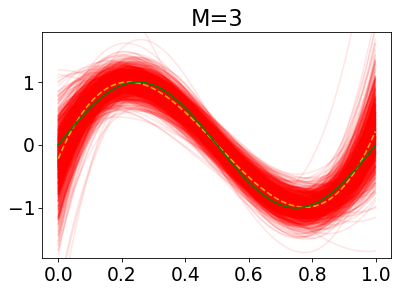

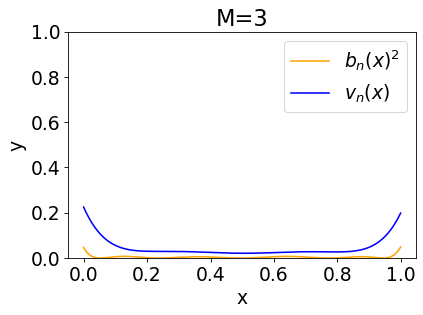

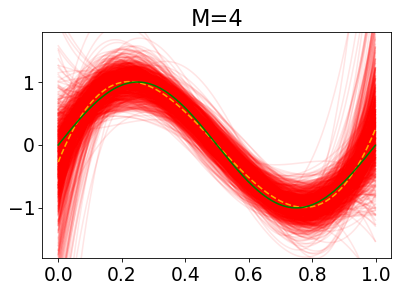

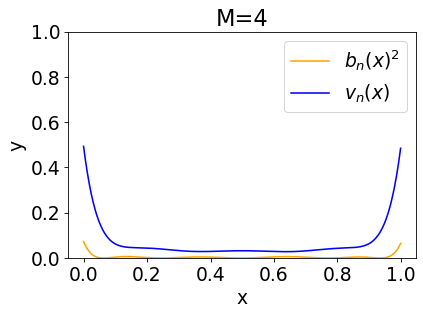

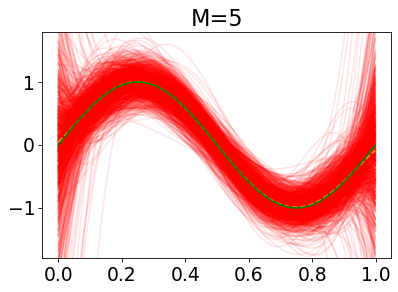

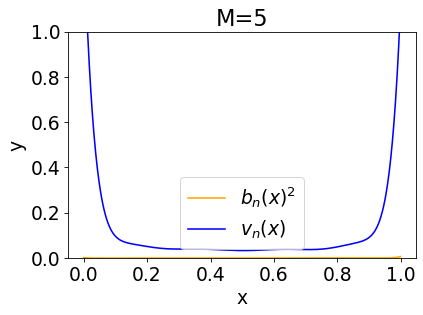

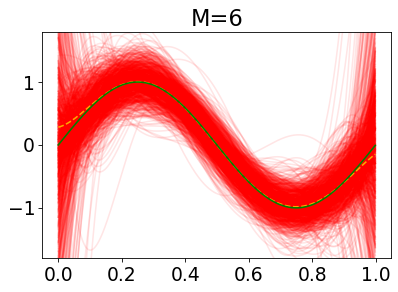

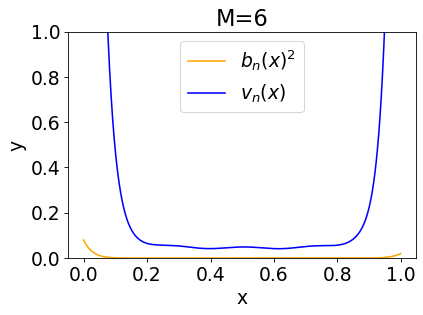

In [9]:
Mmax = 6 # Max polynomial order to consider

y_pred =np.zeros(shape=(X_grid.size, nrep)) 
biaserror = np.zeros(shape=Mmax+1)
varianceerror = np.zeros(shape=Mmax+1)
for M in np.arange(0,Mmax+1):
    for j in np.arange(0, nrep):
        # Generate polynomial features
        poly_reg=PolynomialFeatures(degree=M)
        X_poly = poly_reg.fit_transform(X_rep[:,j].reshape(-1,1))
        X_grid_poly = poly_reg.fit_transform(X_grid.reshape(-1,1))

        # Compute ERM and the associated true and empirical risk
        regr.fit(X_poly, y_rep[:,j])
        y_pred[:,j] = regr.predict(X_grid_poly)
    
    meanpred = y_pred.mean(axis=1)
    bias = meanpred - h_star(X_grid)
    variance = ((y_pred.transpose()-meanpred)**2).mean(axis=0)
    
    plt.figure()
    plt.plot(X_grid, y_pred, color='red', alpha=0.1)
    plt.plot(X_grid, meanpred,'--', color ='orange')
    plt.plot(X_grid, h_star(X_grid), color='green')
    plt.ylim(-1.8,1.8)
    plt.title('M='+str(M))
    if svfigs:
        filename = svdir + 'regression_bv1_sin_p' + str(M) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')
        
    
    
    plt.figure()
    plt.plot(X_grid, bias**2, color='orange')
    plt.plot(X_grid, variance, color='blue')
    plt.ylim([0,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend([r'$b_n(x)^2$', r'$v_n(x)$'])
    plt.title('M=' + str(M))
    if svfigs:
        filename = svdir + 'regression_bv2_sin_p' + str(M) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')
        
    biaserror[M] = (bias**2).mean()
    varianceerror[M] = variance.mean()

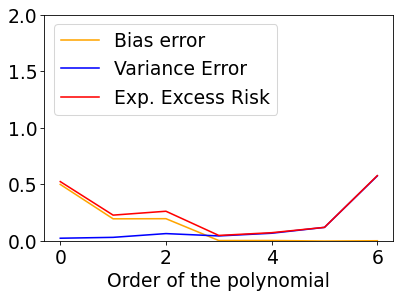

In [10]:
plt.figure()
plt.plot(biaserror, color = 'orange')
plt.plot(varianceerror, color='blue')
plt.plot(biaserror+varianceerror, color='red')
plt.ylim(0,2)
plt.xlabel('Order of the polynomial')
plt.legend(['Bias error', 'Variance Error','Exp. Excess Risk'], loc=2)
if svfigs:
    filename = svdir + 'risk_bv_sin'
    plt.savefig(filename, bbox_inches = 'tight')

Ridge Regression

lambda= 10.0 : beta= [[ 0.00077412 -0.13426389 -0.1352669  -0.12074981 -0.10423242 -0.08907669
  -0.07606974 -0.06519309 -0.05618238 -0.04872645]]
lambda= 1.0 : beta= [[ 0.2765439  -0.38451051 -0.4248655  -0.35652493 -0.27081591 -0.19251647
  -0.12773502 -0.07654653 -0.03714193 -0.00733744]]
lambda= 0.01 : beta= [[ 0.42751816  1.08114388 -2.44933073 -2.5052715  -1.52687692 -0.42188509
   0.50934009  1.19672532  1.65654529  1.93206048]]
lambda= 0.0001 : beta= [[ 0.30662378  2.64110049 -2.56827902 -7.889479   -3.88413342  2.50434996
   6.3686646   6.02676504  1.73661813 -5.44286786]]
lambda= 1e-06 : beta= [[  0.32053794   2.72766355 -11.36537504  31.01451417 -37.34201093
  -37.05666896  19.11861822  58.39230032  34.60851696 -61.7898647 ]]
lambda= 1e-08 : beta= [[ 1.01624953e-01  1.80198290e+01 -1.30454870e+02  2.63008846e+02
   4.52783244e+01 -4.45444842e+02 -1.23284865e+02  3.94088231e+02
   3.89804227e+02 -4.14948283e+02]]


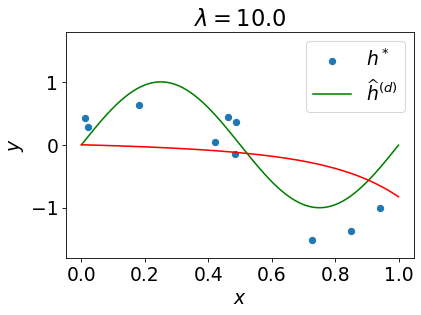

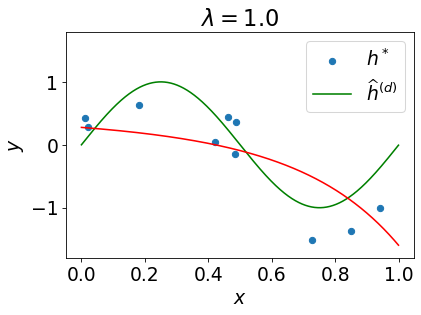

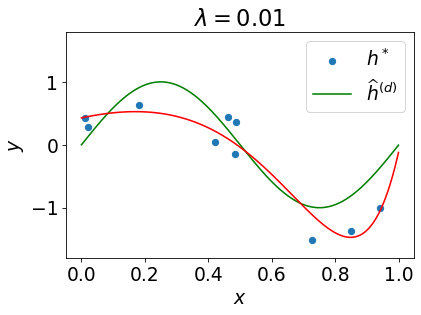

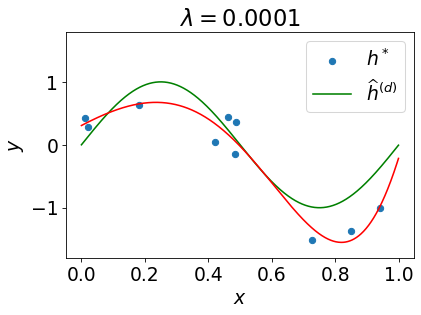

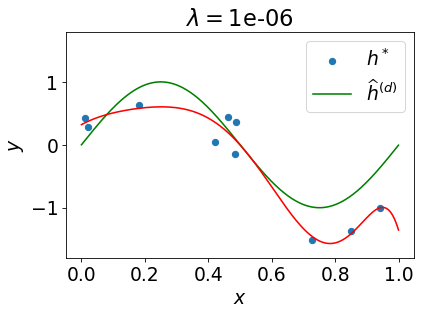

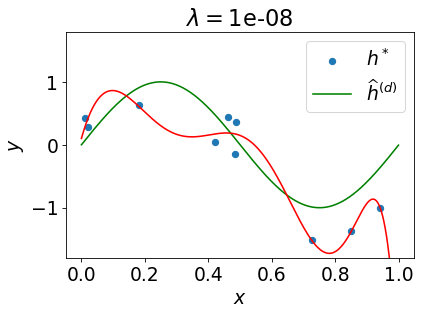

In [11]:
# Ridge regression

M = 9
lambda_all = np.array([10, 1, .01, 10**(-4), 10**(-6), 10**(-8)])
beta = np.empty(shape=(lambda_all.size, M+1))
approxerror3 = np.empty(shape=lambda_all.size)
truerisk3 = np.empty(shape=lambda_all.size)
emprisk3 = np.empty(shape=lambda_all.size)

for j in np.arange(0,lambda_all.size):
    
    ridge_regr = linear_model.Ridge(fit_intercept=False, alpha=lambda_all[j])

    poly_reg = PolynomialFeatures(degree=M)
    X_poly = poly_reg.fit_transform(X.reshape(-1,1))
    X_grid_poly = poly_reg.fit_transform(X_grid.reshape(-1,1))

    # Compute ERM and the associated true and empirical risk
    ridge_regr.fit(X_poly, y)
    y_pred = ridge_regr.predict(X_grid_poly)
    truerisk3[j] = ((h_star(X_grid).reshape(-1,1) - y_pred) ** 2).mean() + sd**2 # True risk of predictor 
    emprisk3[j] = ((y - ridge_regr.predict(X_poly)) ** 2).mean() # Empirical risk of predictor

    print('lambda=', str(lambda_all[j]), ': beta=', ridge_regr.coef_[:])
    beta[j,:] = ridge_regr.coef_[:]

    plt.figure()
    plt.scatter(X, y)
    plt.plot(X_grid, h_star(X_grid), color='green')

    plt.plot(X_grid, y_pred, color='red')    
    plt.ylim(-1.,1)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.ylim(-1.8,1.8)
    plt.legend([r'$h^*$',r'$\widehat h^{(d)}$'])
    plt.title(r'$\lambda=$' + str(lambda_all[j]) )
    if svfigs:
        filename = svdir + 'regressionridge_sin_p' + str(j) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')


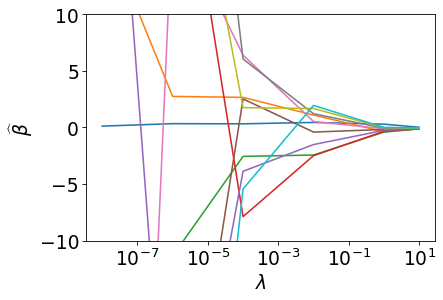

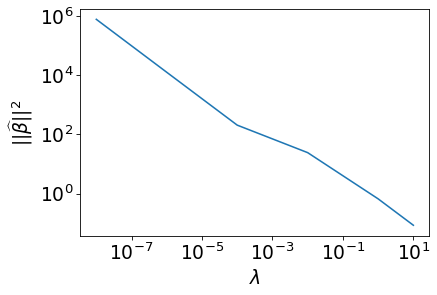

In [12]:
plt.figure()
plt.plot(lambda_all, beta)
plt.xscale('log')
plt.ylim(-10,10)
plt.ylabel(r'$\widehat\beta$')
plt.xlabel(r'$\lambda$')
if svfigs:
    filename = svdir + 'regressionridge_sin_beta' +'.png'
    plt.savefig(filename, bbox_inches = 'tight')

plt.figure()
plt.plot(lambda_all, (beta**2).sum(axis=1))
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$||\widehat\beta||^2$')
plt.xlabel(r'$\lambda$')
if svfigs:
    filename = svdir + 'regressionridge_sin_normbeta' +'.png'
    plt.savefig(filename, bbox_inches = 'tight')

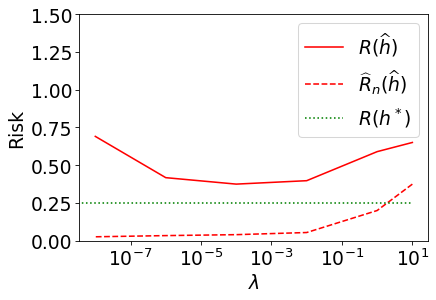

In [13]:
plt.figure()
plt.plot(lambda_all,truerisk3, color='red')
plt.plot(lambda_all,emprisk3, '--', color='red')
plt.plot(sd**2 * np.ones(shape=emprisk.size),':' , color='green' )
plt.xscale('log')
plt.ylabel('Risk')
plt.ylim([0,1.5])
plt.xlabel(r'$\lambda$')
plt.legend([r'$R(\widehat h)$', r'$\widehat R_n(\widehat h)$', r'$R(h^*)$'])
if svfigs:
    filename = svdir + 'regressionridge_sin_trueemprisk' +'.png'
    plt.savefig(filename, bbox_inches = 'tight')

Ridge Regression and bias-variance decomposition

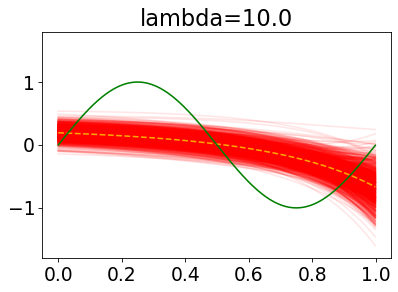

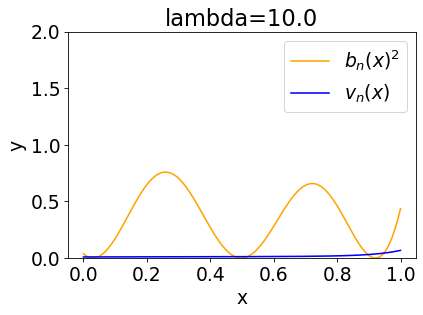

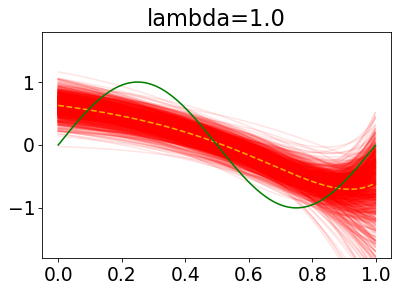

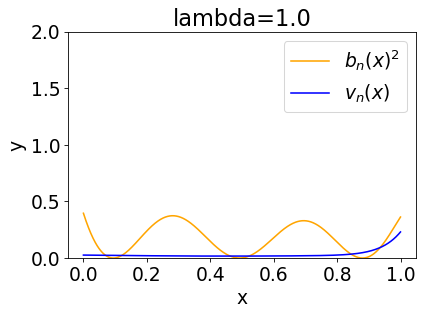

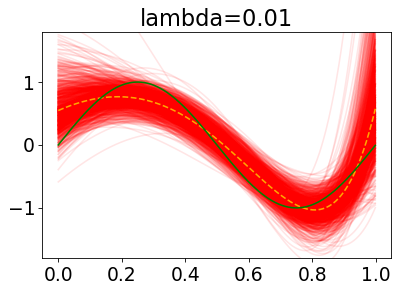

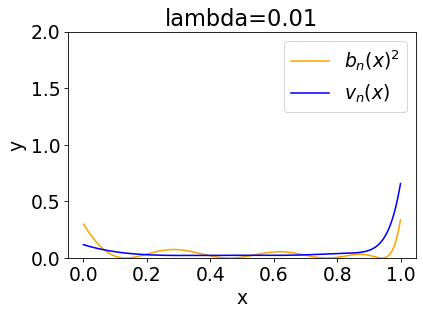

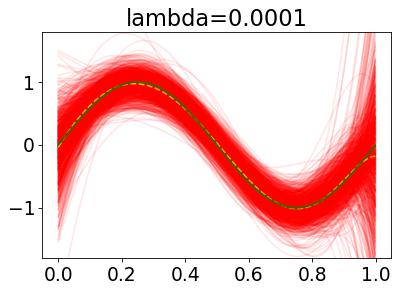

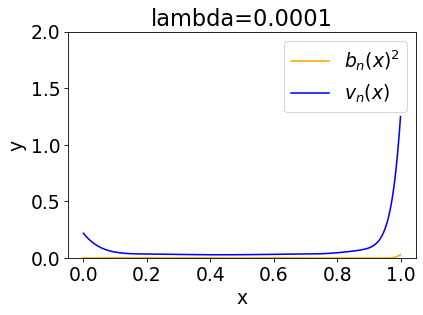

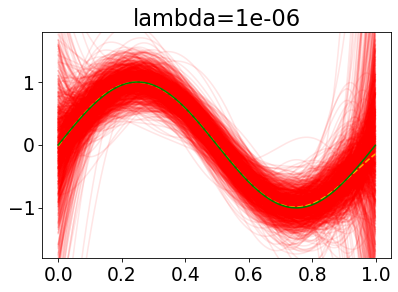

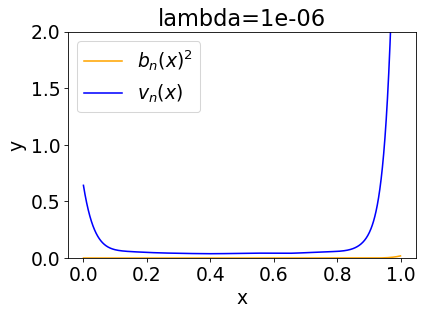

In [14]:
lambda_all = np.array([10, 1, .01, 10**(-4), 10**(-6)])

y_pred =np.zeros(shape=(X_grid.size, nrep)) 
biaserror_ridge = np.empty(shape=lambda_all.size)
varianceerror_ridge = np.empty(shape=lambda_all.size)
    
M = 9
poly_reg=PolynomialFeatures(degree=M)
X_grid_poly = poly_reg.fit_transform(X_grid.reshape(-1,1))
        
for i in np.arange(0,lambda_all.size):
    ridge_regr = linear_model.Ridge(fit_intercept=False, alpha=lambda_all[i])
    
    for j in np.arange(0, nrep):
        # Generate polynomial features
        X_poly = poly_reg.fit_transform(X_rep[:,j].reshape(-1,1))       

        # Compute ERM
        ridge_regr.fit(X_poly, y_rep[:,j])
        y_pred[:,j] = ridge_regr.predict(X_grid_poly)
    
    meanpred = y_pred.mean(axis=1)
    bias = meanpred - h_star(X_grid)
    variance = ((y_pred.transpose()-meanpred)**2).mean(axis=0)
    plt.figure()
    plt.plot(X_grid, y_pred, color='red', alpha=0.1)
    plt.plot(X_grid, meanpred,'--', color ='orange')
    plt.plot(X_grid, h_star(X_grid), color='green')
    plt.ylim(-1.8,1.8)
    plt.title('lambda='+str(lambda_all[i]))
    if svfigs:
        filename = svdir + 'regressionridge_bv1_sin' + str(i) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')
    
    
    plt.figure()
    plt.plot(X_grid, bias**2, color='orange')
    plt.plot(X_grid, variance, color='blue')
    plt.ylim([0,2])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend([r'$b_n(x)^2$', r'$v_n(x)$'])
    plt.title('lambda='+str(lambda_all[i]))
    if svfigs:
        filename = svdir + 'regressionridge_bv2_sin' + str(i) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')
        
    biaserror_ridge[i] = (bias**2).mean()
    varianceerror_ridge[i] = variance.mean()
    

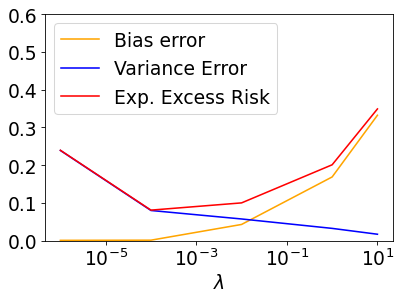

In [15]:
plt.figure()
plt.plot(lambda_all,biaserror_ridge, color = 'orange')
plt.plot(lambda_all,varianceerror_ridge, color='blue')
plt.plot(lambda_all,biaserror_ridge+varianceerror_ridge, color='red')
plt.ylim(0,.6)
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.legend(['Bias error', 'Variance Error','Exp. Excess Risk'], loc=2)
if svfigs:
    filename = svdir + 'riskridge_bv_sin'
    plt.savefig(filename, bbox_inches = 'tight')

Risk as a function of the size of the dataset

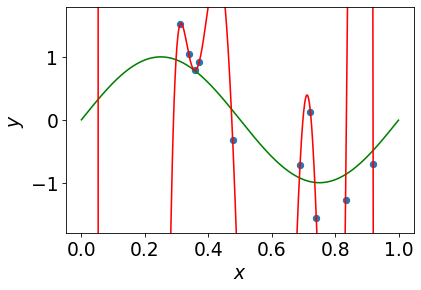

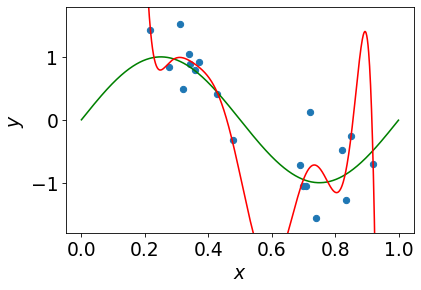

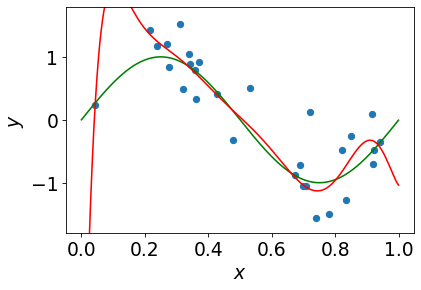

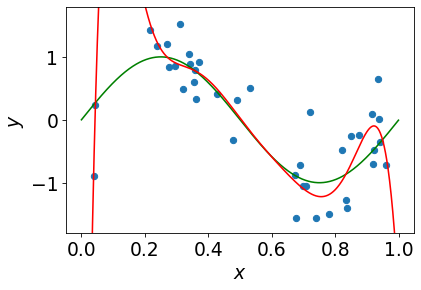

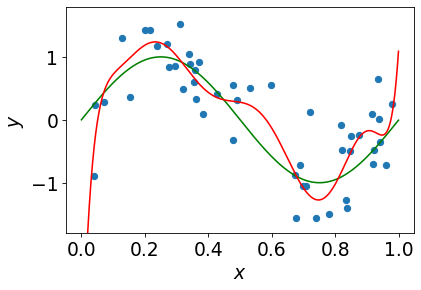

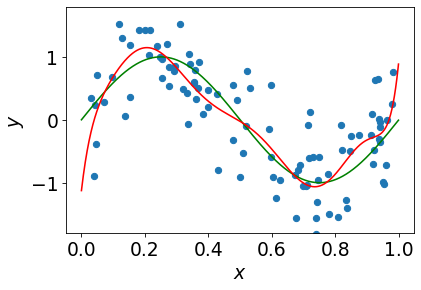

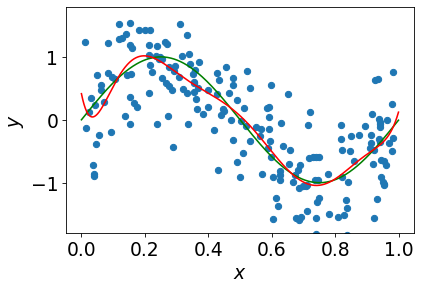

In [16]:
# Look at the risk as a function of the size of the dataset

M = 9 # degree of polynomial
# Generate dataset of large size
nmax = 200
X = np.random.uniform(size = (nmax, 1))
y = h_star(X) + np.random.normal(loc=0, scale=sd, size=(nmax, 1))

n_all = np.array([10,20,30,40,50,100, 200])
truerisk2 = np.empty(shape=n_all.shape)
emprisk2 = np.empty(shape=n_all.shape)
for i in np.arange(0,n_all.size):
    n = n_all[i]
    poly_reg=PolynomialFeatures(degree=M)
    X_poly = poly_reg.fit_transform(X[0:n].reshape(-1,1))
    X_grid_poly = poly_reg.fit_transform(X_grid.reshape(-1,1))
    
    # Compute ERM and the associated true and empirical risk
    regr.fit(X_poly, y[0:n])
    y_pred = regr.predict(X_grid_poly)
    truerisk2[i] = ((h_star(X_grid).reshape(-1,1) - y_pred) ** 2).mean() + sd**2 # True risk of predictor 
    emprisk2[i] = ((y[0:n] - regr.predict(X_poly)) ** 2).mean() # Empirical risk of predictor
    
    
    
    plt.figure()
    plt.scatter(X[0:n], y[0:n])
    plt.plot(X_grid, h_star(X_grid), color='green')
    
    plt.plot(X_grid, y_pred, color='red')    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.ylim(-1.8,1.8)
    if svfigs:
        filename = svdir + 'regression_sin3_n' + str(n) +'.png'
        plt.savefig(filename, bbox_inches = 'tight')
  

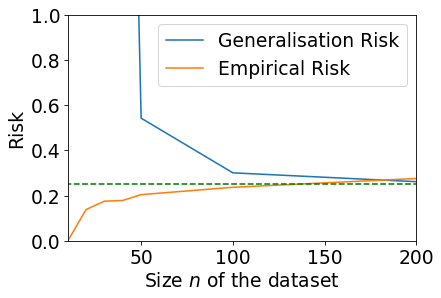

In [17]:
plt.figure()
plt.plot(n_all, truerisk2)
plt.plot(n_all, emprisk2)
plt.hlines(approxerror[-1]+sd**2,0,nmax, linestyles='dashed', color='green')
plt.xlim(10,nmax)
plt.ylim(0,1)
plt.xlabel(r'Size $n$ of the dataset')
plt.ylabel('Risk')
plt.legend(['Generalisation Risk', 'Empirical Risk'])
if svfigs:
    plt.savefig(svdir + 'regression_sin_risk3', bbox_inches = 'tight')